In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data_science_job.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [3]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
col=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
df=pd.read_csv('data_science_job.csv',usecols=['city_development_index',
                                               'experience',
                                               'training_hours',
                                               'target'])

In [7]:
df

,city_development_index,experience,training_hours,target
0,0.920,20.0,36.0,1.0
1,0.776,15.0,47.0,0.0
2,0.624,5.0,83.0,0.0
3,0.789,0.0,52.0,1.0
4,0.767,20.0,8.0,0.0
...,...,...,...,...
19153,0.878,14.0,42.0,1.0
19154,0.920,14.0,52.0,1.0
19155,0.920,20.0,44.0,0.0
19156,0.802,0.0,97.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],train_size=0.2,random_state=0)
x_train

,city_development_index,experience,training_hours
7725,0.920,4.0,56.0
135,0.920,NaN,70.0
3620,0.920,4.0,52.0
5413,0.910,8.0,86.0
12672,0.926,20.0,43.0
...,...,...,...
9225,0.479,10.0,35.0
13123,0.624,6.0,NaN
9845,0.920,6.0,48.0
10799,0.624,2.0,75.0


In [9]:
y_train

7725     0.0
135      0.0
3620     0.0
5413     0.0
12672    0.0
        ... 
9225     1.0
13123    1.0
9845     0.0
10799    0.0
2732     0.0
Name: target, Length: 3831, dtype: float64

In [10]:
(x_train.isnull().mean())*100

city_development_index    2.819107
experience                0.443748
training_hours            3.706604
dtype: float64

In [11]:
mean_cdi=x_train['city_development_index'].mean()
median_cdi=x_train['city_development_index'].median()

mean_th=x_train['training_hours'].mean()
median_th=x_train['training_hours'].median()

mean_ex=x_train['experience'].mean()
median_ex=x_train['experience'].median()


mean_cdi=x_test['city_development_index'].mean()
median_cdi=x_test['city_development_index'].median()

mean_th=x_test['training_hours'].mean()
median_th=x_test['training_hours'].median()

mean_ex=x_test['experience'].mean()
median_ex=x_test['experience'].median()

In [12]:
x_train['mean_cdi']=x_train['city_development_index'].fillna(mean_cdi)
x_train['median_cdi']=x_train['city_development_index'].fillna(median_cdi)

x_train['mean_th']=x_train['training_hours'].fillna(mean_th)
x_train['median_th']=x_train['training_hours'].fillna(median_th)

x_train['mean_ex']=x_train['experience'].fillna(mean_ex)
x_train['median_ex']=x_train['experience'].fillna(median_ex)

x_test['mean_cdi']=x_test['city_development_index'].fillna(mean_cdi)
x_test['median_cdi']=x_test['city_development_index'].fillna(median_cdi)

x_test['mean_th']=x_test['training_hours'].fillna(mean_th)
x_test['median_th']=x_test['training_hours'].fillna(median_th)

x_test['mean_ex']=x_test['experience'].fillna(mean_ex)
x_test['median_ex']=x_test['experience'].fillna(median_ex)


In [13]:
x_train.head()

,city_development_index,experience,training_hours,mean_cdi,median_cdi,mean_th,median_th,mean_ex,median_ex
7725,0.920,4.0,56.0,0.920,0.920,56.0,56.0,4.000000,4.0
135,0.920,NaN,70.0,0.920,0.920,70.0,70.0,9.918647,9.0
3620,0.920,4.0,52.0,0.920,0.920,52.0,52.0,4.000000,4.0
5413,0.910,8.0,86.0,0.910,0.910,86.0,86.0,8.000000,8.0
12672,0.926,20.0,43.0,0.926,0.926,43.0,43.0,20.000000,20.0


In [14]:
(x_train.isnull().mean())*100

city_development_index    2.819107
experience                0.443748
training_hours            3.706604
mean_cdi                  0.000000
median_cdi                0.000000
mean_th                   0.000000
median_th                 0.000000
mean_ex                   0.000000
median_ex                 0.000000
dtype: float64

In [15]:
x_train.isnull().sum()

city_development_index    108
experience                 17
training_hours            142
mean_cdi                    0
median_cdi                  0
mean_th                     0
median_th                   0
mean_ex                     0
median_ex                   0
dtype: int64

In [16]:
print('x_train : ')
print('Original city_development_index Variance : ',x_train['city_development_index'].var())
print('Mean city_development_index Variance : ',x_train['mean_cdi'].var())
print('Median city_development_index Variance : ',x_train['median_cdi'].var())

print('Original experience Variance : ',x_train['experience'].var())
print('Mean experience Variance : ',x_train['mean_ex'].var())
print('Median experience Variance : ',x_train['median_ex'].var())

print('Original training_hours Variance : ',x_train['training_hours'].var())
print('Mean training_hours Variance : ',x_train['mean_th'].var())
print('Median training_hours Variance : ',x_train['median_th'].var())
# checking variance for x_test
print('x_test : ')
print('Original city_development_index Variance : ',x_test['city_development_index'].var())
print('Mean city_development_index Variance : ',x_test['mean_cdi'].var())
print('Median city_development_index Variance : ',x_test['median_cdi'].var())

print('Original experience Variance : ',x_test['experience'].var())
print('Mean experience Variance : ',x_test['mean_ex'].var())
print('Median experience Variance : ',x_test['median_ex'].var())

print('Original training_hours Variance : ',x_test['training_hours'].var())
print('Mean training_hours Variance : ',x_test['mean_th'].var())
print('Median training_hours Variance : ',x_test['median_th'].var())


x_train : 
Original city_development_index Variance :  0.015490988573289828
Mean city_development_index Variance :  0.015054338642238537
Median city_development_index Variance :  0.015212671119689651
Original experience Variance :  42.49423040240891
Mean experience Variance :  42.30562347802776
Median experience Variance :  42.30973431665434
Original training_hours Variance :  3464.8123844177558
Mean training_hours Variance :  3336.3787828656864
Median training_hours Variance :  3347.2769162929962
x_test : 
Original city_development_index Variance :  0.015141552744186694
Mean city_development_index Variance :  0.014775017701246972
Median city_development_index Variance :  0.014902800168215123
Original experience Variance :  42.27699159639913
Mean experience Variance :  42.144582905505644
Median experience Variance :  42.147217701817475
Original training_hours Variance :  3616.853752298061
Mean training_hours Variance :  3469.5931010234885
Median training_hours Variance :  3482.75838885

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

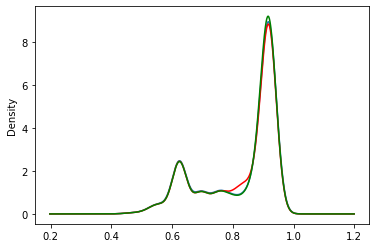

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of age
x_train['city_development_index'].plot(kind='kde',ax=ax)

#distribution of mean_age
x_train['mean_cdi'].plot(kind='kde',ax=ax,color='red')

#distribution of median_age
x_train['median_cdi'].plot(kind='kde',ax=ax,color='green')

<AxesSubplot:ylabel='Density'>

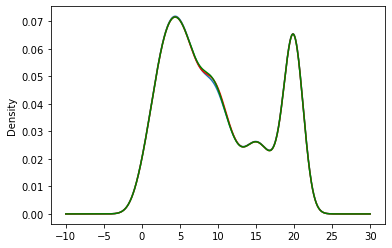

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of age
x_train['experience'].plot(kind='kde',ax=ax)

#distribution of mean_age
x_train['mean_ex'].plot(kind='kde',ax=ax,color='red')

#distribution of median_age
x_train['median_ex'].plot(kind='kde',ax=ax,color='green')

<AxesSubplot:ylabel='Density'>

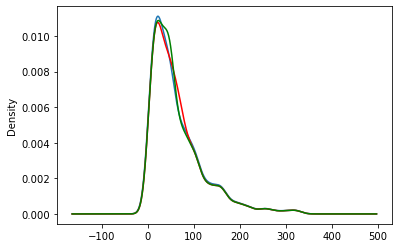

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original distribution of age
x_train['training_hours'].plot(kind='kde',ax=ax)

#distribution of mean_age
x_train['mean_th'].plot(kind='kde',ax=ax,color='red')

#distribution of median_age
x_train['median_th'].plot(kind='kde',ax=ax,color='green')

In [21]:
x_train.cov()

,city_development_index,experience,training_hours,mean_cdi,median_cdi,mean_th,median_th,mean_ex,median_ex
city_development_index,0.015491,0.273751,-0.141583,0.015491,0.015491,-0.136943,-0.123059,0.272506,0.272793
experience,0.273751,42.494230,1.370739,0.266065,0.268336,1.302659,1.654745,42.494230,42.494230
training_hours,-0.141583,1.370739,3464.812384,-0.137570,-0.138343,3464.812384,3464.812384,1.362976,1.343144
mean_cdi,0.015491,0.266065,-0.137570,0.015054,0.015059,-0.133107,-0.119603,0.264898,0.265178
median_cdi,0.015491,0.268336,-0.138343,0.015059,0.015213,-0.133868,-0.120010,0.267159,0.267447
mean_th,-0.136943,1.302659,3464.812384,-0.133107,-0.133868,3336.378783,3335.810824,1.295906,1.276941
median_th,-0.123059,1.654745,3464.812384,-0.119603,-0.120010,3335.810824,3347.276916,1.646287,1.624547
mean_ex,0.272506,42.494230,1.362976,0.264898,0.267159,1.295906,1.646287,42.305623,42.305814
median_ex,0.272793,42.494230,1.343144,0.265178,0.267447,1.276941,1.624547,42.305814,42.309734


In [22]:
x_test.cov()

,city_development_index,experience,training_hours,mean_cdi,median_cdi,mean_th,median_th,mean_ex,median_ex
city_development_index,0.015142,0.265214,0.015866,0.015142,0.015142,0.015215,0.018889,0.264399,0.264562
experience,0.265214,42.276992,-0.730355,0.258810,0.258478,-0.700829,-0.552443,42.276992,42.276992
training_hours,0.015866,-0.730355,3616.853752,0.015477,0.014916,3616.853752,3616.853752,-0.728286,-0.746458
mean_cdi,0.015142,0.258810,0.015477,0.014775,0.014775,0.014847,0.018432,0.257999,0.258158
median_cdi,0.015142,0.258478,0.014916,0.014775,0.014903,0.014308,0.018431,0.257668,0.257823
mean_th,0.015215,-0.700829,3616.853752,0.014847,0.014308,3469.593101,3469.593101,-0.698634,-0.716066
median_th,0.018889,-0.552443,3616.853752,0.018432,0.018431,3469.593101,3482.758389,-0.550713,-0.566994
mean_ex,0.264399,42.276992,-0.728286,0.257999,0.257668,-0.698634,-0.550713,42.144583,42.144583
median_ex,0.264562,42.276992,-0.746458,0.258158,0.257823,-0.716066,-0.566994,42.144583,42.147218


In [23]:
x_train.corr()

,city_development_index,experience,training_hours,mean_cdi,median_cdi,mean_th,median_th,mean_ex,median_ex
city_development_index,1.000000,0.337718,-0.019360,1.000000,1.000000,-0.019012,-0.017057,0.336653,0.336991
experience,0.337718,1.000000,0.003575,0.332971,0.334064,0.003463,0.004392,1.000000,1.000000
training_hours,-0.019360,0.003575,1.000000,-0.019124,-0.019131,1.000000,1.000000,0.003559,0.003508
mean_cdi,1.000000,0.332971,-0.019124,1.000000,0.995116,-0.018782,-0.016849,0.331932,0.332266
median_cdi,1.000000,0.334064,-0.019131,0.995116,1.000000,-0.018790,-0.016818,0.333019,0.333361
mean_th,-0.019012,0.003463,1.000000,-0.018782,-0.018790,1.000000,0.998201,0.003449,0.003399
median_th,-0.017057,0.004392,1.000000,-0.016849,-0.016818,0.998201,1.000000,0.004375,0.004317
mean_ex,0.336653,1.000000,0.003559,0.331932,0.333019,0.003449,0.004375,1.000000,0.999956
median_ex,0.336991,1.000000,0.003508,0.332266,0.333361,0.003399,0.004317,0.999956,1.000000


In [24]:
x_test.corr()

,city_development_index,experience,training_hours,mean_cdi,median_cdi,mean_th,median_th,mean_ex,median_ex
city_development_index,1.000000,0.331895,0.002150,1.000000,1.000000,0.002102,0.002605,0.331093,0.331287
experience,0.331895,1.000000,-0.001866,0.327744,0.325924,-0.001829,-0.001439,1.000000,1.000000
training_hours,0.002150,-0.001866,1.000000,0.002121,0.002035,1.000000,1.000000,-0.001864,-0.001910
mean_cdi,1.000000,0.327744,0.002121,1.000000,0.995704,0.002074,0.002569,0.326951,0.327143
median_cdi,1.000000,0.325924,0.002035,0.995704,1.000000,0.001990,0.002558,0.325129,0.325315
mean_th,0.002102,-0.001829,1.000000,0.002074,0.001990,1.000000,0.998108,-0.001827,-0.001873
median_th,0.002605,-0.001439,1.000000,0.002569,0.002558,0.998108,1.000000,-0.001437,-0.001480
mean_ex,0.331093,1.000000,-0.001864,0.326951,0.325129,-0.001827,-0.001437,1.000000,0.999969
median_ex,0.331287,1.000000,-0.001910,0.327143,0.325315,-0.001873,-0.001480,0.999969,1.000000


<AxesSubplot:>

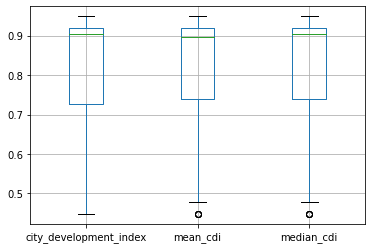

In [25]:
x_train[['city_development_index','mean_cdi','median_cdi']].boxplot()

<AxesSubplot:>

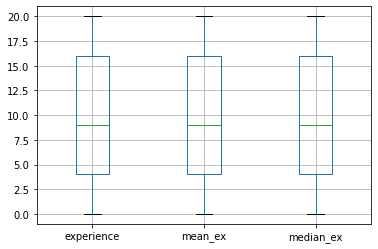

In [26]:
x_train[['experience','mean_ex','median_ex']].boxplot()

<AxesSubplot:>

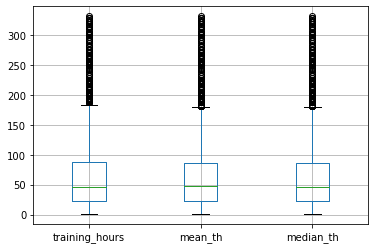

In [27]:
x_train[['training_hours','mean_th','median_th']].boxplot()

## By Sklearn

In [28]:
df

,city_development_index,experience,training_hours,target
0,0.920,20.0,36.0,1.0
1,0.776,15.0,47.0,0.0
2,0.624,5.0,83.0,0.0
3,0.789,0.0,52.0,1.0
4,0.767,20.0,8.0,0.0
...,...,...,...,...
19153,0.878,14.0,42.0,1.0
19154,0.920,14.0,52.0,1.0
19155,0.920,20.0,44.0,0.0
19156,0.802,0.0,97.0,0.0


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('target',axis=1),df['target'],train_size=0.2,random_state=0)
X_train

,city_development_index,experience,training_hours
7725,0.920,4.0,56.0
135,0.920,NaN,70.0
3620,0.920,4.0,52.0
5413,0.910,8.0,86.0
12672,0.926,20.0,43.0
...,...,...,...
9225,0.479,10.0,35.0
13123,0.624,6.0,NaN
9845,0.920,6.0,48.0
10799,0.624,2.0,75.0


In [30]:
from sklearn.impute import SimpleImputer

In [31]:
impute1=SimpleImputer(strategy='mean')
impute2=SimpleImputer(strategy='median')

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
trf=ColumnTransformer([
    ('mean_cdi',impute1,['city_development_index']),
    ('mean_ex',impute1,['experience']),
    ('mean_th',impute1,['training_hours']),
    ('median_cdi',impute2,['city_development_index']),
    ('median_ex',impute2,['experience']),
    ('median_th',impute2,['training_hours'])
],remainder='passthrough')

In [34]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_cdi', SimpleImputer(),
                                 ['city_development_index']),
                                ('mean_ex', SimpleImputer(), ['experience']),
                                ('mean_th', SimpleImputer(),
                                 ['training_hours']),
                                ('median_cdi', SimpleImputer(strategy='median'),
                                 ['city_development_index']),
                                ('median_ex', SimpleImputer(strategy='median'),
                                 ['experience']),
                                ('median_th', SimpleImputer(strategy='median'),
                                 ['training_hours'])])

In [35]:
trf.named_transformers_['mean_cdi'].statistics_

array([0.82694682])

In [36]:
trf.named_transformers_['mean_ex'].statistics_

array([9.96565286])

In [37]:
trf.named_transformers_['mean_th'].statistics_

array([64.49308756])

In [38]:
trf.named_transformers_['median_cdi'].statistics_

array([0.903])

In [39]:
trf.named_transformers_['median_ex'].statistics_

array([9.])

In [40]:
trf.named_transformers_['median_th'].statistics_

array([47.])

In [41]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [42]:
X_train

array([[ 0.92      ,  4.        , 56.        ,  0.92      ,  4.        ,
        56.        ],
       [ 0.92      ,  9.96565286, 70.        ,  0.92      ,  9.        ,
        70.        ],
       [ 0.92      ,  4.        , 52.        ,  0.92      ,  4.        ,
        52.        ],
       ...,
       [ 0.92      ,  6.        , 48.        ,  0.92      ,  6.        ,
        48.        ],
       [ 0.624     ,  2.        , 75.        ,  0.624     ,  2.        ,
        75.        ],
       [ 0.91      , 12.        ,  3.        ,  0.91      , 12.        ,
         3.        ]])

In [43]:
X_test

array([[  0.939,  17.   ,  57.   ,   0.939,  17.   ,  57.   ],
       [  0.92 ,  10.   , 129.   ,   0.92 ,  10.   , 129.   ],
       [  0.926,   2.   ,  48.   ,   0.926,   2.   ,  48.   ],
       ...,
       [  0.92 ,  12.   ,  72.   ,   0.92 ,  12.   ,  72.   ],
       [  0.698,   7.   , 192.   ,   0.698,   7.   , 192.   ],
       [  0.92 ,  20.   ,  69.   ,   0.92 ,  20.   ,  69.   ]])

In [100]:
#X_train=pd.DataFrame(X_train).rename(columns={0:'city_development_index',1:'experience',2:'training_hours',3:})
X_train.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'